In [1]:
import numpy as np
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd 

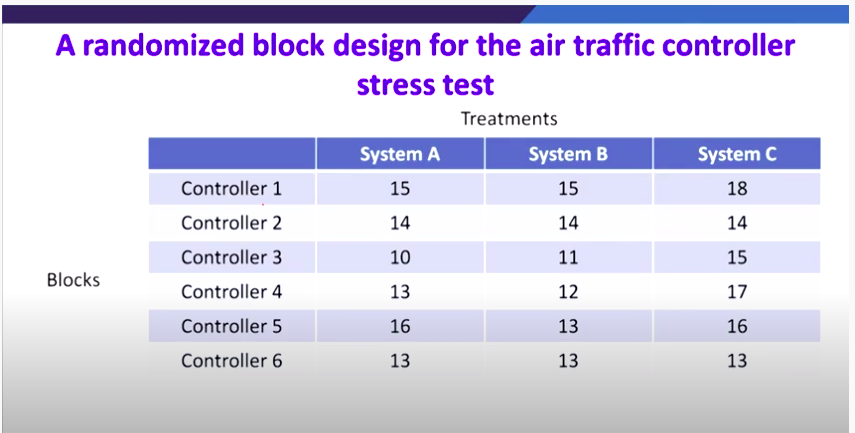

In [2]:
data={'System A':[15,14,10,13,16,13],'System B':[15,14,11,12,13,13],'System C':[18,14,15,17,16,13]}
data=pd.DataFrame(data)
data

,System A,System B,System C
0,15,15,18
1,14,14,14
2,10,11,15
3,13,12,17
4,16,13,16
5,13,13,13


In [3]:
data_new=pd.melt(data.reset_index(),id_vars=['index'],value_vars=data.columns)
data_new.columns=['index','treatments','value']
data_new

,index,treatments,value
0,0,System A,15
1,1,System A,14
2,2,System A,10
3,3,System A,13
4,4,System A,16
5,5,System A,13
6,0,System B,15
7,1,System B,14
8,2,System B,11
9,3,System B,12


In [5]:
model=ols('value ~ C(treatments)', data=data_new).fit()
model.summary()

/home/abhilash/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.214
Date:                Sun, 20 Dec 2020   Prob (F-statistic):             0.0689
Time:                        12:33:28   Log-Likelihood:                -34.554
No. Observations:                  18   AIC:                             75.11
Df Residuals:                      15   BIC:                             77.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    13.5000      0.738     18.296      0.000      11.927      15.073
C(treatments)[T.System B]    -0.5000      1.043     -0.479      0.639      -2.724       1.724
C(treatments)[T.System C]     2.0000      1.043      1.917      0.075      -0.224       4.224
==============================================================================
Omnibus:                        0.471   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.790   Jarque-Bera (JB):                0.558
Skew:                          -0.297   Prob(JB):                        0.757
Kurtosis:                       2.375   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
anova_table=sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,21.0,10.500000,3.214286,0.068903
Residual,15.0,49.0,3.266667,NaN,NaN


In [9]:
# Calculating SST (Total sum of Squares)
sst=0.0
for i in data_new.value:
    sst+=(i-np.mean(data_new.value))**2
    
print(sst)

70.0


In [10]:
# Sum of Squares due to treatement
mean_system_a=np.mean(data['System A'])
mean_system_b=np.mean(data['System B'])
mean_system_c=np.mean(data['System C'])
mean=np.mean(data_new.value)
sstr=6*((mean_system_a-mean)**2+(mean_system_b-mean)**2+(mean_system_c-mean)**2)
print(sstr)

21.0


In [15]:
# sum of squares due to block
mean_block=(data['System A']+data['System B']+data['System C'])/3
ssbl=0.0
for i in mean_block:
    ssbl+=(i-14)**2
ssbl=3*ssbl
print(ssbl)

30.0


In [16]:
# Sum of squares erro
sse=sst-sstr-ssbl
print(sse)

19.0


In [17]:
# Using Blocking
data_new=pd.melt(data.reset_index(),id_vars=['index'],value_vars=data.columns)
data_new.columns=['block','treatment','value']
data_new

,block,treatment,value
0,0,System A,15
1,1,System A,14
2,2,System A,10
3,3,System A,13
4,4,System A,16
5,5,System A,13
6,0,System B,15
7,1,System B,14
8,2,System B,11
9,3,System B,12


In [19]:
model=ols('value ~ C(block)+C(treatment)',data=data_new).fit()
anova_table=sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(block),5.0,30.0,6.0,3.157895,0.057399
C(treatment),2.0,21.0,10.5,5.526316,0.024181
Residual,10.0,19.0,1.9,NaN,NaN


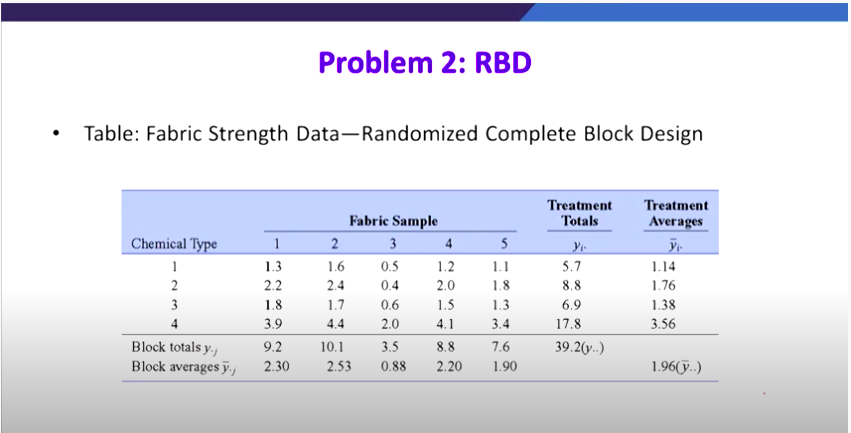

In [24]:
data={'chemical1':[1.3,1.6,0.5,1.2,1.1],'chemical2':[2.2,2.4,0.4,2.0,1.8],'chemical3':[1.8,1.7,0.6,1.5,1.3],
      'chemical4':[3.9,4.4,2.0,4.1,3.4]}
data=pd.DataFrame(data)
data.head()

,chemical1,chemical2,chemical3,chemical4
0,1.3,2.2,1.8,3.9
1,1.6,2.4,1.7,4.4
2,0.5,0.4,0.6,2.0
3,1.2,2.0,1.5,4.1
4,1.1,1.8,1.3,3.4


In [25]:
data_new=pd.melt(data.reset_index(),id_vars=['index'],value_vars=data.columns)
data_new.columns=['block','treatment','value']
data_new.head()

,block,treatment,value
0,0,chemical1,1.3
1,1,chemical1,1.6
2,2,chemical1,0.5
3,3,chemical1,1.2
4,4,chemical1,1.1


In [26]:
model=ols('value ~ C(block)+C(treatment)',data=data_new).fit()
anova_table=sm.stats.anova_lm(model,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(block),4.0,6.693,1.673250,21.113565,2.318913e-05
C(treatment),3.0,18.044,6.014667,75.894848,4.518310e-08
Residual,12.0,0.951,0.079250,NaN,NaN


In [27]:
# Reject the null hypothesis